In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import warnings
warnings.filterwarnings('ignore')


### 1. Importing data

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
print("The df's shape is", df.shape)
df.head()

The df's shape is (13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### 2. Data manipulation

Area types are ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']


<AxesSubplot:>

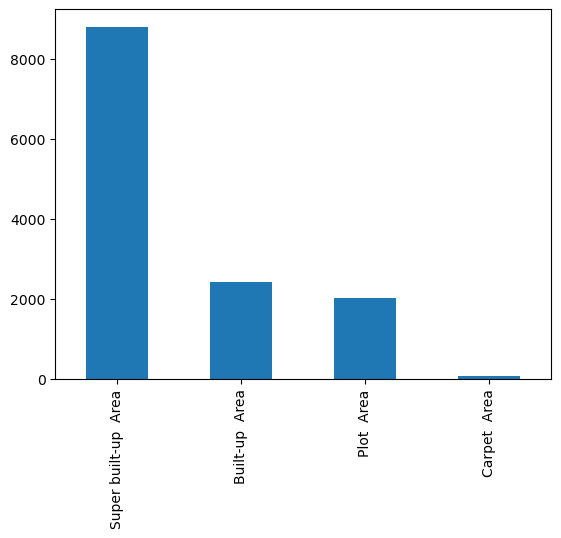

In [3]:
print("Area types are",df['area_type'].unique())
pd.value_counts(df['area_type']).plot.bar()

In [4]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2 = df.drop(['area_type', 'society', 'balcony', 'availability'],axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
# As the empty cells are not too many and the dataset is medium size, they will be dropped
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df3 = df2.dropna()
df3.shape

(13246, 5)

In [8]:
# BHK and Bedroom are the same, will proceed to make the data uniform
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
bhk = []
for row in df3['size']:
    number = row.split()[0]
    bhk.append(number)

In [11]:
df3['BHK'] = bhk
df3['BHK'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [12]:
df3['BHK'].dtypes
df3['BHK'] = df3['BHK'].astype('int')

In [13]:
print("Houses that have more than 20 rooms")
df3[df3.BHK>20]

Houses that have more than 20 rooms


,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [14]:
df3.groupby('BHK')['BHK'].agg('count')

BHK
1      649
2     5527
3     4832
4     1395
5      353
6      221
7      100
8       89
9       54
10      14
11       4
12       1
13       1
14       1
16       1
18       1
19       1
27       1
43       1
Name: BHK, dtype: int64

In [15]:
df3.total_sqft.unique()
# we can observe ranges of values... are there any other possibilities than just numbers/ranges?

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
for row in df3['total_sqft']:
    try:
        row = float(row)
    except:
        print(row)

2100 - 2850
3067 - 8156
1042 - 1105
1145 - 1340
1015 - 1540
34.46Sq. Meter
1195 - 1440
4125Perch
1120 - 1145
3090 - 5002
1160 - 1195
1000Sq. Meter
1115 - 1130
1100Sq. Yards
520 - 645
1000 - 1285
650 - 665
633 - 666
5.31Acres
30Acres
1445 - 1455
884 - 1116
850 - 1093
716Sq. Meter
547.34 - 827.31
580 - 650
3425 - 3435
1804 - 2273
3630 - 3800
4000 - 5249
1500Sq. Meter
142.61Sq. Meter
1574Sq. Yards
1250 - 1305
670 - 980
1005.03 - 1252.49
3630 - 3800
1004 - 1204
361.33Sq. Yards
645 - 936
2710 - 3360
2830 - 2882
596 - 804
1255 - 1863
1300 - 1405
117Sq. Yards
934 - 1437
980 - 1030
2249.81 - 4112.19
1070 - 1315
3040Sq. Meter
500Sq. Yards
2806 - 3019
613 - 648
704 - 730
1210 - 1477
3369 - 3464
1125 - 1500
167Sq. Meter
1076 - 1199
381 - 535
524 - 894
540 - 670
315Sq. Yards
2725 - 3250
888 - 1290
660 - 700
385 - 440
770 - 841
524 - 894
3Cents
188.89Sq. Yards
1469 - 1766
204Sq. Meter
1255 - 1350
870 - 1080
45Sq. Yards
133.3Sq. Yards
2580 - 2591
613 - 648
2563 - 2733
605 - 624
1349 - 3324
78.03Sq. 

In [21]:
i = 0
for row in df3['total_sqft']:
    try:
        df3.at[i, 'total_sqft'] = float(row)
    except:
        if " - "  in row:
            values = row.split(" - ")
            values = [float(x) for x in values]
            suitable_value = sum(values)/len(values)
            df3.at[i, 'total_sqft'] = suitable_value
        elif "Sq. Meter" in row:
            values = row.split("Sq.")
            suitable_value = float(values[0])
            df3.at[i, 'total_sqft'] = suitable_value * 10.7639 
        elif "Sq. Yards" in row:
            values = row.split("Sq.")
            suitable_value = float(values[0])
            df3.at[i, 'total_sqft'] = suitable_value * 9
        elif "Acres" in row:
            values = row.split("Acres")
            suitable_value = float(values[0])
            df3.at[i, 'total_sqft'] = suitable_value * 43560
        else:
            df3.drop(i)
    i += 1


In [22]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0


In [23]:
df4 = df3.copy()

In [24]:
df4["price_per_sqft"] = df3["price"]*100000/df3["total_sqft"]
df4.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.0


In [26]:
#dimention issues, too many locations
df4 = df4.dropna()
df4.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [27]:
for row in df4['location']:
    if not(isinstance(row, str)):
        print(row)

In [28]:
# multiple values from the index column where skipped 
df4 = df4.reset_index(drop=True)

In [29]:
for i in range(len(df4)-1):
    locatiion = df4['location'][i]
    df4.at[i, 'location'] = locatiion.strip()
    

In [30]:
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [31]:
# NOTE: THIS IS THE SAME AS A FOR LOOP
location_stats_less_10 = location_stats[location_stats<=10]
len(location_stats_less_10)

1052

In [32]:
location_stats_less_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [33]:
# converting those 1052 into "other"
for i in range(len(df4['location'])-1):
    if df4['location'][i] in location_stats_less_10:
         df4.at[i, 'location'] = 'other'

In [34]:
df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
# only 242 different locations.

location
other               2881
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
                    ... 
LB Shastri Nagar      11
Marsur                11
Narayanapura          11
Nehru Nagar           11
HAL 2nd Stage         11
Name: location, Length: 242, dtype: int64

In [36]:
print(df4.shape)
df4.head()

(13246, 7)


,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.0


In [44]:
# Outliers removal
# [Bussiness domain needed] -> there is a relation between the total_sqft of a house and its bhk. 
# It is assumed that there is at least 100sqft (9.29m2) per room.
size_totalsqft= df4[df4.total_sqft/df4.BHK<100]
print(len(size_totalsqft))


38


In [45]:
df5 = df4[~(df4.total_sqft/df4.BHK<100)]
df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.0


In [54]:
df5['price_per_sqft'] = df5['price_per_sqft'].astype('int')

In [63]:
df5.price_per_sqft.describe()
df5.shape

(13246, 7)

In [74]:
# remove outliers for the price_per_sqft based on the standard deviation
new_df = pd.DataFrame()
for location, location_df in df5.groupby('location'):
    mean = np.mean(location_df.price_per_sqft)
    std = np.std(location_df.price_per_sqft)
    reduced_df = location_df[(location_df.price_per_sqft>(mean - std)) & (location_df.price_per_sqft<=(mean + std))]
    new_df = pd.concat([new_df,reduced_df], ignore_index = True)

In [75]:
new_df.shape

(11826, 7)

In [76]:
# another thing to check is that houses as a maximun have 2 bathrooms more than its amount of BHK... reducing outliers
new_df = new_df[(new_df.BHK+2 > new_df.bath)]
new_df.shape

(11669, 7)

In [80]:
for key, df in new_df.groupby('location'):
    print(key)

1st Block Jayanagar
1st Phase JP Nagar
2nd Phase Judicial Layout
2nd Stage Nagarbhavi
5th Block Hbr Layout
5th Phase JP Nagar
6th Phase JP Nagar
7th Phase JP Nagar
8th Phase JP Nagar
9th Phase JP Nagar
AECS Layout
Abbigere
Akshaya Nagar
Ambalipura
Ambedkar Nagar
Amruthahalli
Anandapura
Ananth Nagar
Anekal
Anjanapura
Ardendale
Arekere
Attibele
BEML Layout
BTM 2nd Stage
BTM Layout
Babusapalaya
Badavala Nagar
Balagere
Banashankari
Banashankari Stage II
Banashankari Stage III
Banashankari Stage V
Banashankari Stage VI
Banaswadi
Banjara Layout
Bannerghatta
Bannerghatta Road
Basavangudi
Basaveshwara Nagar
Battarahalli
Begur
Begur Road
Bellandur
Benson Town
Bharathi Nagar
Bhoganhalli
Billekahalli
Binny Pete
Bisuvanahalli
Bommanahalli
Bommasandra
Bommasandra Industrial Area
Bommenahalli
Brookefield
Budigere
CV Raman Nagar
Chamrajpet
Chandapura
Channasandra
Chikka Tirupathi
Chikkabanavar
Chikkalasandra
Choodasandra
Cooke Town
Cox Town
Cunningham Road
Dasanapura
Dasarahalli
Devanahalli
Devarachi

In [82]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    

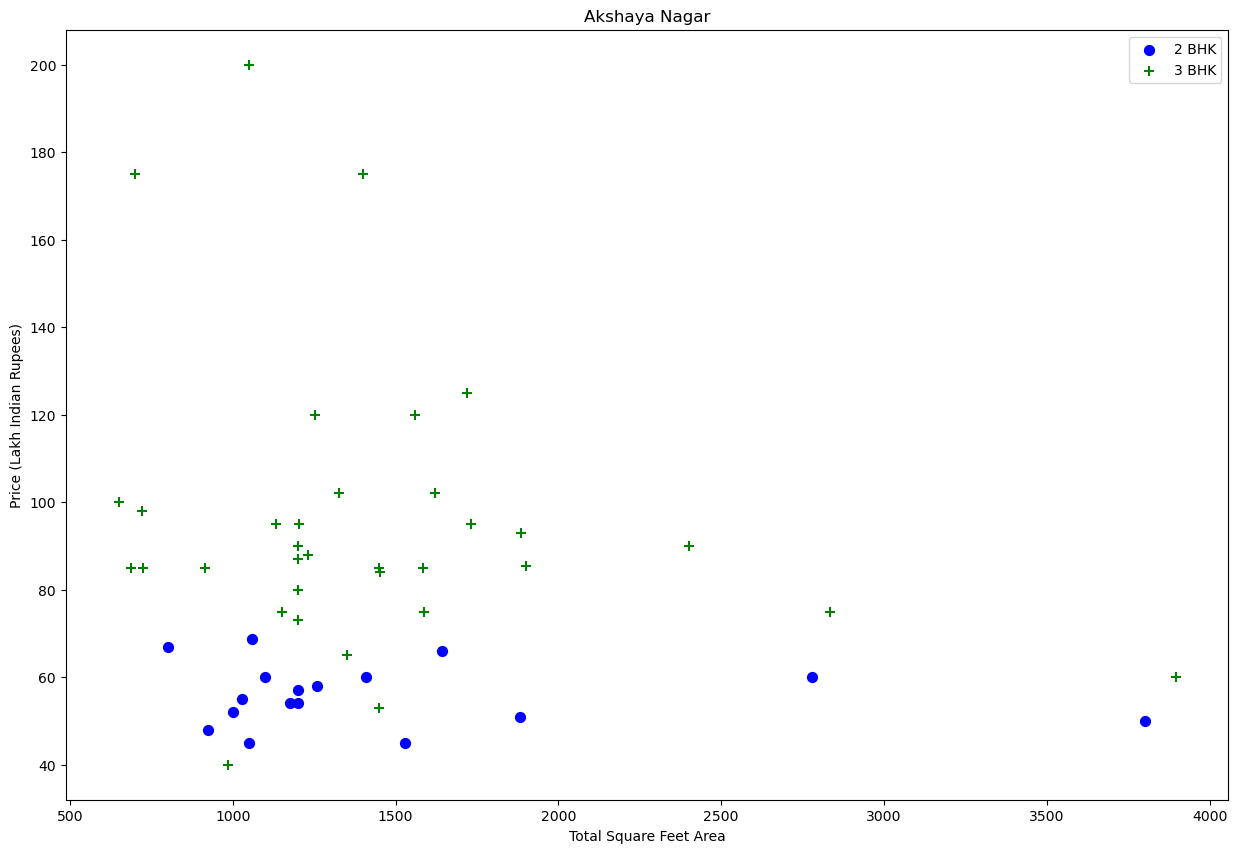

In [84]:
plot_scatter_chart(new_df,"Akshaya Nagar")